In [22]:
import os
import pandas as pd
%matplotlib inline

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [24]:
from newsapi.newsapi_client import NewsApiClient
from dotenv import load_dotenv
# Read your api key environment variable
load_dotenv()
newsapi = NewsApiClient(api_key=os.environ["news_api"])

In [25]:
# Create a newsapi client


In [26]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)


In [27]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [28]:
# Create the Bitcoin sentiment scores DataFrame

bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = [ "compound","negative", "neutral", "positive", "text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,compound,negative,neutral,positive,text
0,0.0000,0.000,1.000,0.000,The Winklevoss twinsthe brothers Mark Zuckerbe...
1,-0.3464,0.134,0.819,0.046,If youre planning to do some protesting and yo...
2,-0.2755,0.070,0.930,0.000,Reuters\r\n<ul><li>Goldman Sachs gave five rea...
3,0.0000,0.000,1.000,0.000,<ul><li>Famed investor Michael Novogratz tweet...
4,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...


In [29]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = [ "compound","negative", "neutral", "positive", "text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,compound,negative,neutral,positive,text
0,0.000,0.0,1.00,0.00,Editor’s note:Andreessen HorowitzsCrypto Start...
1,0.507,0.0,0.91,0.09,Our robot colleague Satoshi Nakaboto writes ab...
2,0.000,0.0,1.00,0.00,Editors note:Andreessen Horowitzs Crypto Start...
3,0.000,0.0,1.00,0.00,For developers looking to quickly build identi...
4,0.000,0.0,1.00,0.00,"Akron, Ohio, the hometown of LeBron James and ..."


In [30]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,negative,neutral,positive
count,93.000000,93.000000,93.000000,93.000000
mean,0.123892,0.039258,0.895774,0.065011
std,0.388493,0.059138,0.084611,0.062497
min,-0.848100,0.000000,0.618000,0.000000
25%,-0.153100,0.000000,0.855000,0.000000
50%,0.177900,0.000000,0.910000,0.067000
75%,0.507000,0.073000,0.944000,0.090000
max,0.919800,0.233000,1.000000,0.335000


In [31]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,negative,neutral,positive
count,96.000000,96.000000,96.000000,96.000000
mean,0.226451,0.028688,0.891687,0.079604
std,0.369192,0.048201,0.081145,0.070915
min,-0.807400,0.000000,0.665000,0.000000
25%,0.000000,0.000000,0.847750,0.000000
50%,0.296000,0.000000,0.885500,0.082500
75%,0.507000,0.056000,0.946000,0.130000
max,0.919800,0.223000,1.000000,0.335000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum at 0.079 vs. Bitcoin at 0.065

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [32]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [39]:
# Expand the default stopwords list if necessary
sw = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()


In [42]:

# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Remove the stop words
    sw = set(stopwords.words('english'))
    words = word_tokenize(re_clean)
    
    # Convert the words to lowercase
    lowercase = [word.lower() for word in words if word.lower() not in sw]
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in lowercase]
    return tokens


In [78]:
# Create a new tokens column for bitcoin
bc_token=[]
for article in bitcoin_df['text']:
    article_token = tokenizer(article)
    bc_token.append(article_token)

bitcoin_df['tokens']=bc_token
bitcoin_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.0000,0.000,1.000,0.000,The Winklevoss twinsthe brothers Mark Zuckerbe...,"[winklevoss, twinsthe, brother, mark, zuckerbe..."
1,-0.3464,0.134,0.819,0.046,If youre planning to do some protesting and yo...,"[youre, planning, protesting, dont, want, risk..."
2,-0.2755,0.070,0.930,0.000,Reuters\r\n<ul><li>Goldman Sachs gave five rea...,"[reutersulligoldman, sachs, gave, five, reason..."
3,0.0000,0.000,1.000,0.000,<ul><li>Famed investor Michael Novogratz tweet...,"[ullifamed, investor, michael, novogratz, twee..."
4,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."


In [79]:
#print(bc_token)

In [80]:
# Create a new tokens column for ethereum
eth_token=[]
for article in ethereum_df['text']:
    article_token = tokenizer(article)
    eth_token.append(article_token)

ethereum_df['tokens']=eth_token
ethereum_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.000,0.0,1.00,0.00,Editor’s note:Andreessen HorowitzsCrypto Start...,"[editor, noteandreessen, horowitzscrypto, star..."
1,0.507,0.0,0.91,0.09,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
2,0.000,0.0,1.00,0.00,Editors note:Andreessen Horowitzs Crypto Start...,"[editor, noteandreessen, horowitz, crypto, sta..."
3,0.000,0.0,1.00,0.00,For developers looking to quickly build identi...,"[developer, looking, quickly, build, identity,..."
4,0.000,0.0,1.00,0.00,"Akron, Ohio, the hometown of LeBron James and ...","[akron, ohio, hometown, lebron, james, seat, u..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [81]:
from collections import Counter
from nltk import ngrams

In [89]:
# Generate the Bitcoin N-grams where N=2
bc_token_ngram = []
for sublist in bc_token:
    for item in sublist:
        bc_token_ngram.append(item)

bigram_counts_bc = Counter(ngrams(bc_token_ngram, n=2))
dict(bigram_counts_bc.most_common(20))

{('satoshi', 'nakaboto'): 38,
 ('bitcoin', 'btc'): 20,
 ('bitcoin', 'char'): 20,
 ('char', 'robot'): 19,
 ('robot', 'colleague'): 19,
 ('colleague', 'satoshi'): 19,
 ('nakaboto', 'writes'): 19,
 ('writes', 'bitcoin'): 19,
 ('every', 'fucking'): 19,
 ('fucking', 'daywelcome'): 19,
 ('daywelcome', 'another'): 19,
 ('another', 'edition'): 19,
 ('edition', 'bitcoin'): 19,
 ('bitcoin', 'today'): 19,
 ('today', 'satoshi'): 19,
 ('nakaboto', 'tell'): 19,
 ('tell', 'whats'): 19,
 ('whats', 'going'): 19,
 ('going', 'bitcoin'): 19,
 ('btc', 'every'): 18}

In [66]:
# Generate the Ethereum N-grams where N=2
eth_token_ngram = []
for listicle in eth_token:
    for wordeditem in listicle:
        eth_token_ngram.append(wordeditem)

bigram_counts_eth = Counter(ngrams(eth_token_ngram, n=2))
dict(bigram_counts_eth.most_common(20))

{('char', 'day'): 17,
 ('day', 'aheadethereum'): 17,
 ('aheadethereum', 'would'): 17,
 ('would', 'need'): 17,
 ('major', 'resistance'): 17,
 ('resistance', 'level'): 17,
 ('broader', 'market'): 17,
 ('market', 'would'): 17,
 ('would', 'needed'): 17,
 ('first', 'major'): 16,
 ('needed', 'however'): 16,
 ('level', 'support'): 12,
 ('level', 'bring'): 11,
 ('level', 'playsupport'): 11,
 ('playsupport', 'broader'): 11,
 ('bring', 'first'): 10,
 ('need', 'avoid'): 9,
 ('avoid', 'sub'): 9,
 ('sub', 'level'): 9,
 ('satoshi', 'nakaboto'): 8}

In [67]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [92]:
# Get the top 10 words for Bitcoin
token_count(bc_token_ngram)

[('bitcoin', 116),
 ('char', 93),
 ('satoshi', 42),
 ('nakaboto', 38),
 ('btc', 23),
 ('today', 22),
 ('another', 21),
 ('whats', 20),
 ('going', 20),
 ('robot', 19)]

In [93]:
# Get the top 10 words for Ethereum
token_count(eth_token_ngram)

[('char', 94),
 ('level', 37),
 ('would', 35),
 ('ethereum', 32),
 ('bitcoin', 24),
 ('day', 23),
 ('first', 21),
 ('market', 21),
 ('major', 19),
 ('resistance', 19)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [94]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

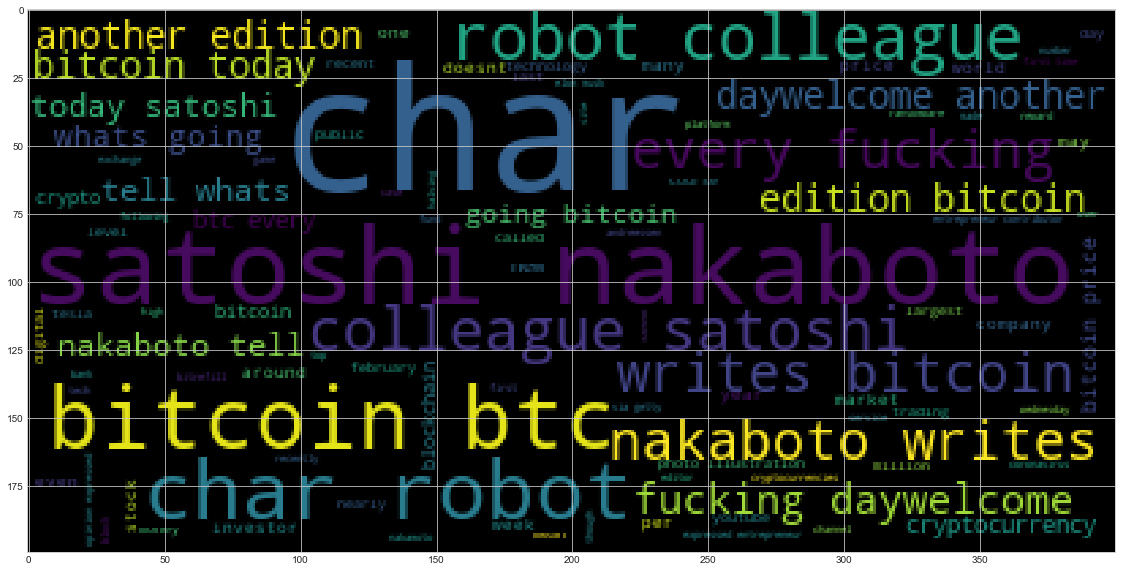

In [99]:
# Generate the Bitcoin word cloud
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)
big_string_bc =  ' '.join(bc_token_ngram)
input_text = process_text(big_string_bc)
wc = WordCloud().generate(input_text)
plt.imshow(wc)

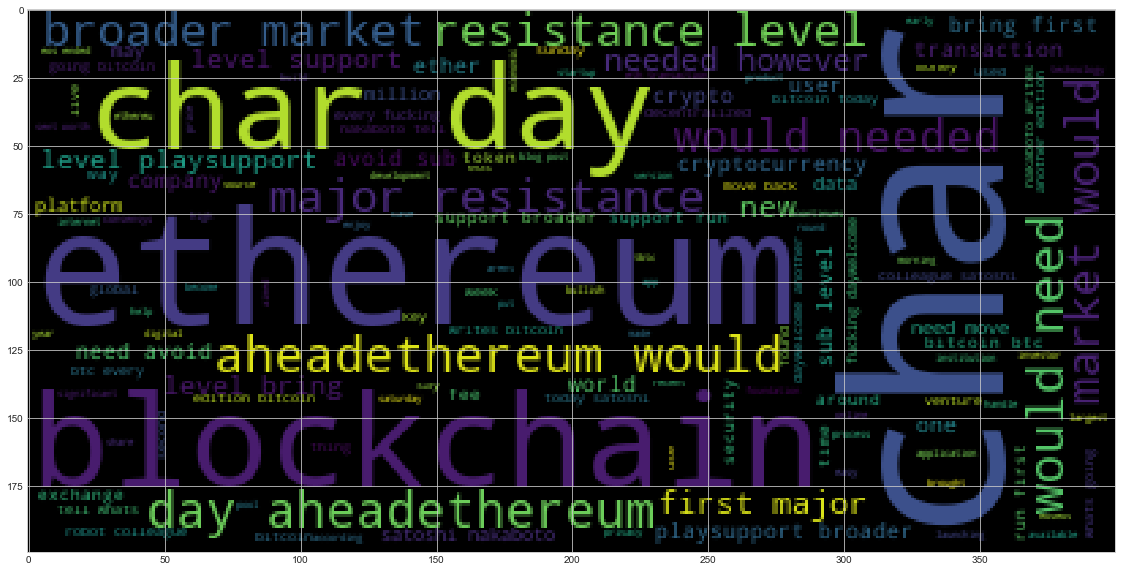

In [100]:
# Generate the Ethereum word cloud
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)
big_string_bc =  ' '.join(eth_token_ngram)
input_text = process_text(big_string_bc)
wc = WordCloud().generate(input_text)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [101]:
import spacy
from spacy import displacy

In [102]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [103]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [105]:
# Concatenate all of the bitcoin text together
bc_concat = ' '.join(bitcoin_df['text'])
bc_concat

'The Winklevoss twinsthe brothers Mark Zuckerberg allegedly stole the idea for Facebook fromare making a movie about themselves, Deadline reported this week. If that doesnt seem masturbatory enough, r… [+2657 chars] If youre planning to do some protesting and you dont want to risk your expensive smartphone in the processor you simply want to keep yourself as anonymous as possible while youre outconsider buying a… [+5568 chars] Reuters\r\n<ul><li>Goldman Sachs gave five reasons why it thinks bitcoin is "not an asset class" nor "a suitable investment" in a presentation Wednesday morning.</li><li>Goldman observed that the crypt… [+3412 chars] <ul><li>Famed investor Michael Novogratz tweeted on Monday that bitcoin will soon take out the $10,000 resistance level, telling his followers, "Get on the train."</li><li>Novogratz said that turmoil… [+2757 chars] Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I,

In [107]:
# Run the NER processor on all of the text
doc = nlp(bc_concat)

# Add a title to the document

In [109]:
# Render the visualization
displacy.render(doc, style ='ent')

In [114]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Mark Zuckerberg PERSON
Facebook ORG
Deadline PERSON
this week DATE
+2657 ORG
Reuters
 ORG
Goldman Sachs ORG
five CARDINAL
bitcoin GPE
Wednesday DATE
Goldman ORG
Michael Novogratz PERSON
Monday DATE
bitcoin GPE
$10,000 resistance MONEY
Novogratz PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
2020 DATE
a big year DATE
Bitcoin GPE
Bitcoin GPE
Bitcoin PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto P

---

## Ethereum NER

In [111]:
# Concatenate all of the ethereum text together
eth_concat = ' '.join(ethereum_df['text'])
eth_concat

'Editor’s note:Andreessen HorowitzsCrypto Startup School brought together 45 participants from around the U.S. and overseas in a seven-week course to learn how to build crypto companies. Andreessen Ho… [+3009 chars] Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats been going on with Bitcoin in … [+3095 chars] Editors note:Andreessen Horowitzs Crypto Startup School brought together 45 participants from around the U.S. and overseas in a seven-week course to learn how to build crypto companies. Andreessen Ho… [+2503 chars] For developers looking to quickly build identity management into their platforms, the most readily available options don’t stray far from the internet’s biggest, most data-hungry platforms.\r\nMagic, a… [+2450 chars] Akron, Ohio, the hometown of LeBron James and the seat of the US tire industry; the one hundred and twenty seventh largest city in the 

In [112]:
# Run the NER processor on all of the text
doc_eth = nlp(eth_concat)
# Add a title to the document

In [113]:
# Render the visualization
displacy.render(doc_eth, style ='ent')

In [115]:
# List all Entities
for ent in doc_eth.ents:
     print(ent.text, ent.label_)

Andreessen HorowitzsCrypto Startup School ORG
45 CARDINAL
U.S. GPE
seven-week DATE
Andreessen Ho PERSON
+3009 ORG
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Andreessen Horowitzs ORG
Crypto Startup School ORG
45 CARDINAL
U.S. GPE
seven-week DATE
Andreessen Ho PERSON
Akron GPE
Ohio GPE
LeBron James PERSON
US GPE
the one hundred and twenty seventh DATE
US GPE
America GPE
first ORDINAL
The Linux Foundation ORG
Drupal Foundation ORG
OSI ORG
133 MONEY
$2.5 million MONEY
$2.5 million MONEY
Wednesday DATE
morning TIME
March DATE
1500 CARDINAL
well over a hundred CARDINAL
the Mozilla Builders Incubator ORG
more than £30,000 CARDINAL
Bitcoin GPE
Litecoin and Ethereum ORG
Mark Andrews PERSON
St Helens PERSON
England GPE
Liverpool Crown C ORG
+2411 ORG
Intel ORG
CrossTalk ORG
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PE